In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
df = pd.read_csv("Used_Bikes.csv")
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
# Check and delete NULLs
print(df.isnull().sum())       # Show null count per column
df.dropna(inplace=True)        # Drop rows with any nulls

# Check and delete Duplicates
print(df.duplicated().sum())   # Show how many duplicate rows exist
df.drop_duplicates(inplace=True)  # Drop those duplicate rows


bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64
25324


In [5]:
cat_col = df.select_dtypes(include="object")
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [6]:
#feature selection
cat_col = cat_col.drop(["bike_name","city"],axis=1)
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [7]:
num_col = df.select_dtypes(exclude="object")
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [8]:
#cat --> num
#label encoding
#one hot encoding

In [9]:
#one hot encoding


pd.get_dummies(cat_col).astype(int).head()
#astype helps in defining the type of data to be shown here categorical to numerical

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
#label encoding

cat_col["owner"].value_counts()

owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [11]:
dt = {"First Owner":1,
      "Second Owner":2,
      "Third Owner":3,
      "Fourth Owner Or More":4
}

In [12]:
cat_col["owner"]=cat_col["owner"].map(dt)

In [13]:
cat_col.head()

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha


In [14]:
cat_col["brand"].value_counts()

brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [15]:
{i : key for key, i in enumerate(list(cat_col["brand"].unique()))}

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [16]:
dt = {'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [17]:
cat_col["brand"]=cat_col["brand"].map(dt)

In [18]:
cat_col.head()

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [19]:
final_df = pd.concat([cat_col,num_col],axis=1)
final_df.head()

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0


In [20]:
matrix = final_df.corr()
matrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.005844,-0.005188,0.062612,0.203151,0.043746
brand,0.005844,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.005188,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.043746,0.068647,0.807641,-0.168295,-0.164211,1.000000


<Axes: >

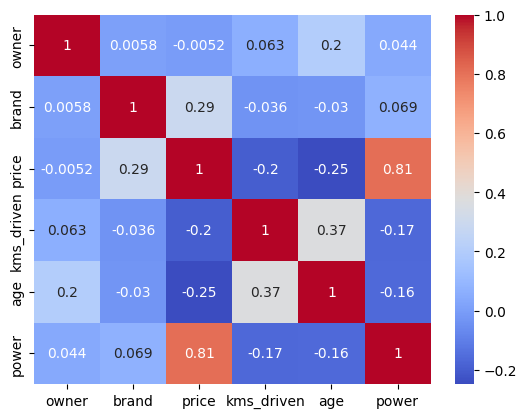

In [21]:
sns.heatmap(matrix,annot=True,cmap="coolwarm")

In [22]:
x = final_df.drop("price",axis=1)
y = final_df["price"]

In [23]:
### training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
lr.score(x_train,y_train)  ##accuracy

0.7053826605671762

In [26]:
lr.score(x_test,y_test)  

0.7586900869386048

In [27]:
y_pred = lr.predict(x_test)
y_pred

array([125382.54523531, 216422.20333613,  96966.48595239, ...,
        72233.83615101, 208856.67620683,   9305.60087565], shape=(1465,))

In [28]:
df1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df1

,Actual,Predicted
4909,88400.0,125382.545235
1942,102850.0,216422.203336
5763,67000.0,96966.485952
4800,30000.0,7571.713344
7614,20000.0,8532.577046
...,...,...
5653,395000.0,476134.279312
609,140000.0,175120.608085
4211,54500.0,72233.836151
6379,114000.0,208856.676207


In [29]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 34658.30986561101
MSE: 4697994405.450356
RMSE: 68541.91714163206


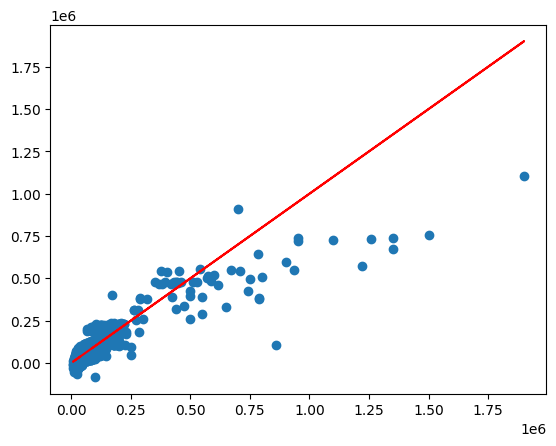

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color="red")

## LOGISTIC REGRESSION

In [31]:
df = pd.read_csv("cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [33]:
# Check and delete NULLs
print(df.isnull().sum())       # Show null count per column
df.dropna(inplace=True)        # Drop rows with any nulls

# Check and delete Duplicates
print(df.duplicated().sum())   # Show how many duplicate rows exist
df.drop_duplicates(inplace=True)  # Drop those duplicate rows

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64
172


In [34]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [35]:
loyal_customer = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customer = df[df["Customer Type"] == "disloyal Customer"]

In [36]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [37]:
balance_df = pd.concat([loyal_customer, disloyal_customer], axis=0)
balance_df.shape

(38905, 12)

In [38]:
cat_col = balance_df.select_dtypes(include=["object"])
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
23891,Female,Loyal Customer,Business travel,Business,satisfied
33330,Male,Loyal Customer,Business travel,Eco,satisfied
88692,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
35806,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
80662,Male,Loyal Customer,Business travel,Eco Plus,neutral or dissatisfied


In [39]:
num_col = df.select_dtypes(exclude="object")
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,5,4,5,25,18.0
1,25,235,1,3,1,1,6.0
2,26,1142,5,4,5,0,0.0
3,25,562,2,3,2,11,9.0
4,61,214,3,4,3,0,0.0


In [40]:
pd.get_dummies(cat_col).astype(int).head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
23891,1,0,1,0,1,0,1,0,0,0,1
33330,0,1,1,0,1,0,0,1,0,0,1
88692,1,0,1,0,1,0,1,0,0,1,0
35806,0,1,1,0,0,1,0,1,0,1,0
80662,0,1,1,0,1,0,0,0,1,1,0


In [41]:
pd.get_dummies(cat_col, drop_first=True).astype(int).head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
23891,0,0,0,0,0,1
33330,1,0,0,1,0,1
88692,0,0,0,0,0,0
35806,1,0,1,1,0,0
80662,1,0,0,0,1,0


In [42]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder(drop="if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded


array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], shape=(38905, 7))

In [43]:
column_name = list(ohe.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [44]:
one_hot = pd.DataFrame(cat_col_encoded, columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
one_hot = one_hot.reset_index(drop=True)
num_col = num_col.reset_index(drop=True)
final_df = pd.concat([one_hot,num_col], axis=1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13,460,5,4,5,25,18.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,25,235,1,3,1,1,6.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26,1142,5,4,5,0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,25,562,2,3,2,11,9.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,61,214,3,4,3,0,0.0


In [46]:
## x and y ---> train test split ---> algo train

In [47]:
matrix = final_df.corr()
matrix

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Gender_Male,1.000000,-0.040338,0.017013,0.021613,-0.005808,-0.033448,0.024749,-0.002201,0.001173,-0.000824,0.000488,0.002422,0.005335,0.005269
Customer Type_disloyal Customer,-0.040338,1.000000,-0.458984,-0.115987,0.155510,-0.085668,-0.254439,0.009751,-0.007376,0.000785,0.001715,-0.002639,0.002569,0.002685
Type of Travel_Personal Travel,0.017013,-0.458984,1.000000,-0.377101,0.326458,0.103501,-0.272902,0.003603,0.007853,-0.002190,0.000564,-0.002571,-0.003582,-0.004546
Class_Business,0.021613,-0.115987,-0.377101,1.000000,-0.889454,-0.223821,0.444306,-0.007541,0.001317,-0.000600,0.000244,0.004935,0.002699,0.001915
Class_Eco,-0.005808,0.155510,0.326458,-0.889454,1.000000,-0.246352,-0.405205,0.001752,0.004050,0.002226,0.001218,-0.000988,-0.004028,-0.002807
Class_Eco Plus,-0.033448,-0.085668,0.103501,-0.223821,-0.246352,1.000000,-0.078087,0.012255,-0.011430,-0.003475,-0.003115,-0.008358,0.002867,0.001925
satisfaction_satisfied,0.024749,-0.254439,-0.272902,0.444306,-0.405205,-0.078087,1.000000,-0.002581,0.000822,0.003872,-0.006449,0.007957,0.009618,0.009506
Age,-0.002201,0.009751,0.003603,-0.007541,0.001752,0.012255,-0.002581,1.000000,0.099897,0.076164,-0.047880,0.053474,-0.010071,-0.012068
Flight Distance,0.001173,-0.007376,0.007853,0.001317,0.004050,-0.011430,0.000822,0.099897,1.000000,0.128634,0.063368,0.093077,0.001796,-0.002540
Inflight entertainment,-0.000824,0.000785,-0.002190,-0.000600,0.002226,-0.003475,0.003872,0.076164,0.128634,1.000000,0.378289,0.691561,-0.027496,-0.030507


<Axes: >

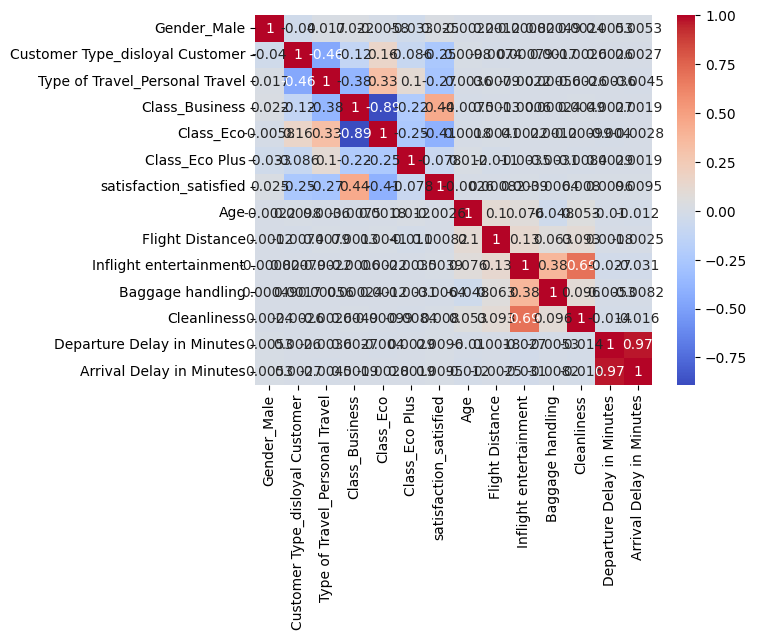

In [48]:
sns.heatmap(matrix,annot=True,cmap="coolwarm")

In [49]:
### training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
lr1.score(x_train,y_train) 

0.7053826605671762

In [52]:
lr1.score(x_test,y_test)  

0.7586900869386048

In [53]:
y_pred = lr1.predict(x_test)
y_pred

array([125382.54523531, 216422.20333613,  96966.48595239, ...,
        72233.83615101, 208856.67620683,   9305.60087565], shape=(1465,))

In [54]:
df11 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df11

,Actual,Predicted
4909,88400.0,125382.545235
1942,102850.0,216422.203336
5763,67000.0,96966.485952
4800,30000.0,7571.713344
7614,20000.0,8532.577046
...,...,...
5653,395000.0,476134.279312
609,140000.0,175120.608085
4211,54500.0,72233.836151
6379,114000.0,208856.676207


In [55]:
import pickle, joblib
pickle.dump(lr1, open("model.pkl","wb")) # wb = binary